Here I compare drug prioritization results based on CMap and those based on network proximity under the same input differentially expressed AD gene sets.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sudhir's DE AD genes

In [2]:
fpath = '../../results/2021-10-04-CMap-discussion/query-1/arfs/TAG/query_result.gct'
usecols_cmap = ['pert_iname', 'cell_iname', 'pert_type', 'pert_idose', 'pert_itime', 'nsample', 'raw_cs', 'fdr_q_nlog10', 'norm_cs']
dtype_cmap = {'pert_iname': 'str', 'cell_iname': 'str', 'pert_idose': 'str', 'pert_itime': 'str', 'nsample': np.int32, 'raw_cs': np.float64, 'fdr_q_nlog10': np.float64, 'norm_cs': np.float64}
sudhir_cmap = pd.read_csv(fpath, sep='\t', skiprows=[0, 1, 3], na_values='-666', usecols=usecols_cmap, dtype=dtype_cmap)#.drop('1', axis=1)
# note that drug_name is a misnomer when the perturbation is not a drug
sudhir_cmap['drug_name'] = sudhir_cmap.pert_iname.str.upper()
sudhir_cmap

,pert_iname,cell_iname,pert_type,pert_idose,pert_itime,nsample,raw_cs,fdr_q_nlog10,norm_cs,drug_name
0,BPHL,HEPG2,trt_sh,NaN,96 h,4,0.5032,3.4284,1.9937,BPHL
1,ALB,PC3,trt_sh,NaN,96 h,2,0.4922,2.8711,1.9501,ALB
2,BTG2,HT29,trt_sh,NaN,96 h,4,0.4817,2.6436,1.9086,BTG2
3,BRD-K55311609,U2OS,trt_cp,10 uM,6 h,3,0.4769,2.5694,1.8897,BRD-K55311609
4,CORO1A,A549,trt_sh,NaN,96 h,3,0.4762,2.5593,1.8868,CORO1A
...,...,...,...,...,...,...,...,...,...,...
423417,USP9X,VCAP,trt_sh,NaN,120 h,3,-0.4565,15.6536,-1.8270,USP9X
423418,ADK,PC3,trt_sh,NaN,96 h,3,-0.4589,15.6536,-1.8369,ADK
423419,ZNF426,MCF7,trt_sh,NaN,96 h,3,-0.4597,15.6536,-1.8398,ZNF426
423420,HIGD2A,HEPG2,trt_sh,NaN,96 h,3,-0.4651,15.6536,-1.8616,HIGD2A


In [3]:
fpath = '../../results/proximity-runs/up-down-sudhir/up-down-sudhir.csv'
sudhir_proxim = pd.read_csv(fpath, index_col=0)
sudhir_proxim

,drug_name,max_phase,indication_class,uniprot_name,target_name,d,avg_d_H0,sdev_d_H0,z,p
CHEMBL1000,CETIRIZINE,4,Antihistaminic,HRH1,Histamine H1 receptor,2.000000,1.816000,0.447375,0.411288,0.659569
CHEMBL1002,LEVOSALBUTAMOL,4,Bronchodilator; Asthma Prophylactic,ADRB2|CP2D6|TSHR|NFKB1|HIF1A,Beta-2 adrenergic receptor|Cytochrome P450 2D6...,1.400000,1.271000,0.142965,0.902319,0.816556
CHEMBL100259,URIDINE,3,NaN,S28A1|GEMI|CDD|S28A3,Sodium/nucleoside cotransporter 1|Geminin|Cyti...,2.000000,1.525500,0.353694,1.341553,0.910130
CHEMBL1004,DOXYLAMINE,4,Antihistaminic,FEN1|EHMT2,Flap endonuclease 1|Histone-lysine N-methyltra...,1.000000,1.167000,0.289156,-0.577544,0.281786
CHEMBL1006,AMIFOSTINE,4,Protectant (topical); Radioprotector,ARSA|DRD3|RGS4|EHMT2,Cerebroside-sulfatase|Dopamine D3 receptor|Reg...,1.000000,1.550500,0.230651,-2.386726,0.008500
...,...,...,...,...,...,...,...,...,...,...
CHEMBL995,LOSARTAN POTASSIUM,4,Antihypertensive,SPN1|ABCBB|AGTR1|AGTR2|RAN|SMAD3|IMB1,GTP-binding nuclear protein Ran/Importin subun...,1.285714,1.379286,0.150914,-0.620032,0.267618
CHEMBL9967,PIRENZEPINE,4,Anti-Ulcerative,LMNA|ACM2|ACM4|ACM5|ACM1|ACM3|DRD1|RGS4|GALC|A...,Prelamin-A/C|Muscarinic acetylcholine receptor...,1.800000,1.786400,0.152693,0.089068,0.535486
CHEMBL997,IBANDRONIC ACID,4,Antihypercalcemic; Bone Resorption Inhibitor,FPPS,Farnesyl diphosphate synthase,1.000000,1.643000,0.487392,-1.319267,0.093540
CHEMBL998,LORATADINE,4,Antihistaminic,NR1I2|CP2C8|CP2D6|CP2C9|ARSA|CP2CJ|HRH1|5HT2B|...,Pregnane X receptor|Cytochrome P450 2C8|Cytoch...,1.750000,1.698250,0.150678,0.343447,0.634369


In [4]:
sudhir = pd.merge(sudhir_proxim, sudhir_cmap, on='drug_name', how='inner')

['named-figure/cmap-proxim-sudhir.png', 'named-figure/cmap-proxim-sudhir.pdf']

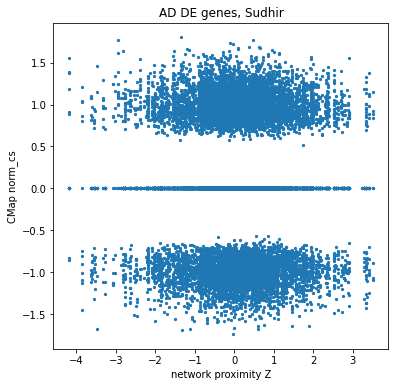

In [5]:
def cmap_proxim_plot(df, title):
    fig, ax = plt.subplots(figsize=(6,6))
    df.plot(kind='scatter', x='z', y='norm_cs', marker='.', ax=ax)
    ax.set_xlabel('network proximity Z')
    ax.set_ylabel('CMap norm_cs')
    ax.set_title(title)
    return((fig, ax))

fig, ax = cmap_proxim_plot(sudhir, title='AD DE genes, Sudhir')
attila_utils.savefig(fig, 'cmap-proxim-sudhir')

## DE AD genes given APOE genotype

These AD DE gene sets were derived from the [bumetanide repurposing study](https://www.nature.com/articles/s43587-021-00122-7), see [2021-11-28-ad-de-genes-apoe](https://github.com/attilagk/CTNS-notebook/blob/main/2021-11-28-ad-de-genes-apoe/2021-11-28-ad-de-genes-apoe.ipynb).

In [6]:
def read_cmap_helper(fpath):
    usecols_cmap = ['pert_iname', 'cell_iname', 'pert_type', 'pert_idose', 'pert_itime', 'nsample', 'raw_cs', 'fdr_q_nlog10', 'norm_cs']
    dtype_cmap = {'pert_iname': 'str', 'cell_iname': 'str', 'pert_idose': 'str', 'pert_itime': 'str', 'nsample': np.int32, 'raw_cs': np.float64, 'fdr_q_nlog10': np.float64, 'norm_cs': np.float64}
    df = pd.read_csv(fpath, sep='\t', skiprows=[0, 1, 3], na_values='-666', usecols=usecols_cmap, dtype=dtype_cmap)#.drop('1', axis=1)
    df['drug_name'] = df.pert_iname.str.upper()
    return(df)

def read_apoe_cmap(genotype='apoe3-apoe3'):
    fpath = '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-' + genotype + '-cmap/arfs/TAG/query_result.gct'
    df = read_cmap_helper(fpath)
    return(df)

apoe3apoe3_cmap, apoe4apoe4_cmap = [read_apoe_cmap(genotype) for genotype in ['apoe3-apoe3', 'apoe4-apoe4']]

In [7]:
def read_apoe_proxim(genotype='apoe3-apoe3'):
    fpath = '../../results/proximity-runs/ad-de-genes-' + genotype + '/ad-de-genes-' + genotype + '.csv'
    df = pd.read_csv(fpath, index_col=0)
    return(df)

apoe3apoe3_proxim, apoe4apoe4_proxim = [read_apoe_proxim(genotype) for genotype in ['apoe3-apoe3', 'apoe4-apoe4']]

In [8]:
apoe3apoe3, apoe4apoe4 = [pd.merge(proxim, cmap, on='drug_name', how='inner') for proxim, cmap in zip([apoe3apoe3_proxim, apoe4apoe4_proxim], [apoe3apoe3_cmap, apoe4apoe4_cmap])]

['named-figure/cmap-proxim-apoe3apoe3.png',
 'named-figure/cmap-proxim-apoe3apoe3.pdf']

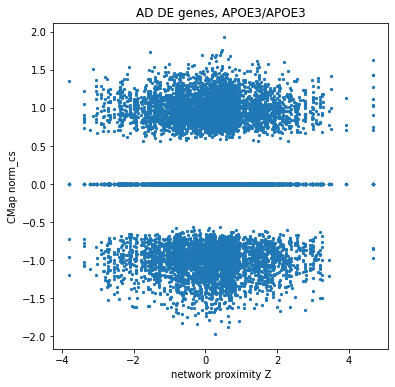

In [9]:
fig, ax = cmap_proxim_plot(apoe3apoe3, title='AD DE genes, APOE3/APOE3')
attila_utils.savefig(fig, 'cmap-proxim-apoe3apoe3')

['named-figure/cmap-proxim-apoe4apoe4.png',
 'named-figure/cmap-proxim-apoe4apoe4.pdf']

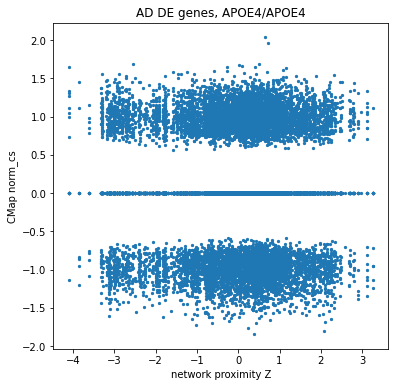

In [10]:
fig, ax = cmap_proxim_plot(apoe4apoe4, title='AD DE genes, APOE4/APOE4')
attila_utils.savefig(fig, 'cmap-proxim-apoe4apoe4')

## AD subtypes (Bin Zhang et al)

In [11]:
def read_subtype_cmap(subtype='A'):
    fpath = '../../results/2021-12-04-ad-subtypes/CMap/subtype-' + subtype + '/arfs/TAG/query_result.gct'
    df = read_cmap_helper(fpath)
    return(df)

A_cmap, B1_cmap, B2_cmap, C1_cmap, C2_cmap = [read_subtype_cmap(subtype) for subtype in ['A', 'B1', 'B2', 'C1', 'C2']]

In [12]:
def read_subtype_proxim(subtype='A'):
    fpath = '../../results/proximity-runs/AD-subtype-' + subtype + '/AD-subtype-' + subtype + '.csv'
    df = pd.read_csv(fpath, index_col=0)
    return(df)

A_proxim, B1_proxim, B2_proxim, C1_proxim, C2_proxim = [read_subtype_proxim(subtype) for subtype in ['A', 'B1', 'B2', 'C1', 'C2']]

In [13]:
A, B1, B2, C1, C2 = [pd.merge(proxim, cmap, on='drug_name', how='inner') for proxim, cmap in zip([A_proxim, B1_proxim, B2_proxim, C1_proxim, C2_proxim], [A_cmap, B1_cmap, B2_cmap, C1_cmap, C2_cmap])]

['named-figure/cmap-proxim-subtype-A.png',
 'named-figure/cmap-proxim-subtype-A.pdf']

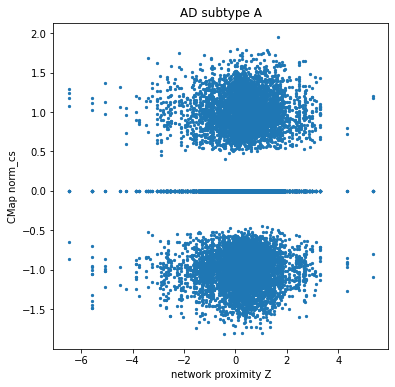

In [14]:
fig, ax = cmap_proxim_plot(A, title='AD subtype A')
attila_utils.savefig(fig, 'cmap-proxim-subtype-A')

['named-figure/cmap-proxim-subtype-B1.png',
 'named-figure/cmap-proxim-subtype-B1.pdf']

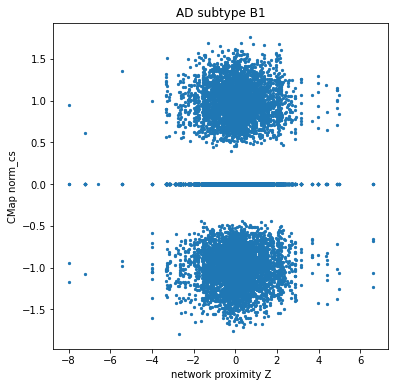

In [15]:
fig, ax = cmap_proxim_plot(B1, title='AD subtype B1')
attila_utils.savefig(fig, 'cmap-proxim-subtype-B1')

['named-figure/cmap-proxim-subtype-B2.png',
 'named-figure/cmap-proxim-subtype-B2.pdf']

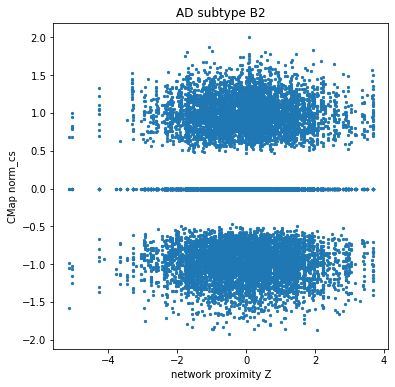

In [16]:
fig, ax = cmap_proxim_plot(B2, title='AD subtype B2')
attila_utils.savefig(fig, 'cmap-proxim-subtype-B2')

['named-figure/cmap-proxim-subtype-C1.png',
 'named-figure/cmap-proxim-subtype-C1.pdf']

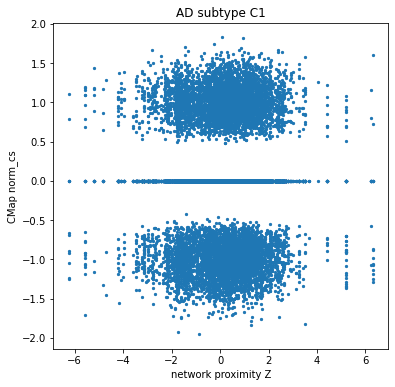

In [17]:
fig, ax = cmap_proxim_plot(C1, title='AD subtype C1')
attila_utils.savefig(fig, 'cmap-proxim-subtype-C1')

['named-figure/cmap-proxim-subtype-C2.png',
 'named-figure/cmap-proxim-subtype-C2.pdf']

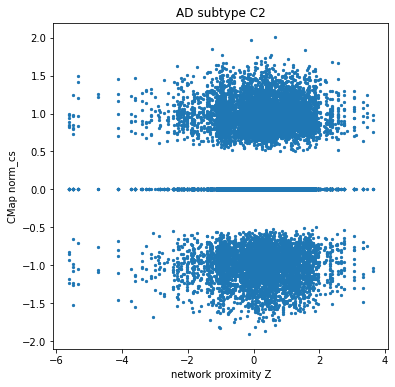

In [18]:
fig, ax = cmap_proxim_plot(C2, title='AD subtype C2')
attila_utils.savefig(fig, 'cmap-proxim-subtype-C2')

## Conclusion

Based on several differentially expressed AD gene sets we don't see the expected correlation between the score of CMap and that of the network proximity approach.  CMap results might need filtering (for celltype?) to uncover the correlation---if it really exists.

In [19]:
%connect_info

{
  "shell_port": 54296,
  "iopub_port": 54297,
  "stdin_port": 54298,
  "control_port": 54300,
  "hb_port": 54299,
  "ip": "127.0.0.1",
  "key": "138f358c-b7dbe8eeab21464510de9141",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a3b53bc5-6e39-4fb9-bce7-3f09bede8175.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
